# CREDIT CARD FRAUD DETECTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Conv1D
from tensorflow.keras.optimizers import Adam

C:\Users\91938\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\91938\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\91938\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\91938\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
df=pd.read_csv('creditcard.csv')

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.isnull().sum()
#Shoes that there are no null values....
#Data is already cleaned

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#                                                         EDA

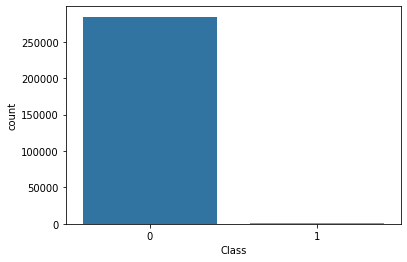

In [8]:
sns.countplot(df['Class'])

In [9]:
def fun(x):
    if x<10:
        return 0
    else:
        if x<50:
            return 1
        else:
            return 2
df['Amount']=df['Amount'].apply(fun)

In [10]:
nf=df[df['Class']==0]

In [11]:
f=df[df['Class']==1]

In [12]:
f['Class'].value_counts()

1    492
Name: Class, dtype: int64

In [13]:
nf=nf.sample(n=1000,random_state=101,replace=False)

In [14]:
nf['Class'].value_counts()

0    1000
Name: Class, dtype: int64

In [15]:
df=pd.concat([nf,f],ignore_index=True)

In [16]:
df['Class'].value_counts()

0    1000
1     492
Name: Class, dtype: int64

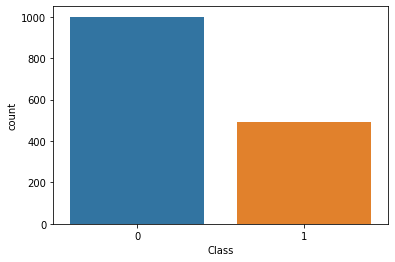

In [17]:
sns.countplot(df['Class'])

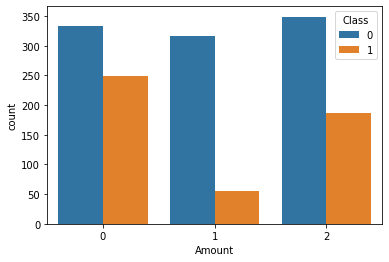

In [18]:
sns.countplot(df['Amount'],hue=df['Class'])

In [19]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,0.203486,-0.190770,0.072984,-0.179992,0.235896,0.058317,0.179761,-0.116218,0.123151,...,-0.049362,0.127913,0.068490,-0.023021,-0.211696,-0.066259,-0.113773,0.019408,0.019423,-0.106274
V1,0.203486,1.000000,-0.789518,0.853590,-0.606344,0.841252,0.288293,0.853083,-0.084364,0.643216,...,-0.002064,-0.039550,-0.028617,-0.038513,-0.061579,0.038841,0.181304,0.026250,-0.058458,-0.482735
V2,-0.190770,-0.789518,1.000000,-0.839127,0.675193,-0.748838,-0.298536,-0.834396,-0.011943,-0.685927,...,0.065876,-0.005832,0.136133,-0.011287,0.080387,-0.009674,-0.107909,-0.067213,-0.180997,0.533501
V3,0.072984,0.853590,-0.839127,1.000000,-0.754981,0.824617,0.417265,0.873435,-0.164872,0.737019,...,0.002207,-0.068161,-0.021928,0.017236,-0.066602,-0.002861,0.080839,0.045816,-0.002154,-0.616162
V4,-0.179992,-0.606344,0.675193,-0.754981,1.000000,-0.569918,-0.402270,-0.692964,0.102193,-0.730150,...,0.009099,0.115756,0.005759,-0.089138,-0.017944,0.084651,-0.006928,0.018289,-0.133146,0.730230
V5,0.235896,0.841252,-0.748838,0.824617,-0.569918,1.000000,0.273624,0.817139,-0.190806,0.623384,...,0.030769,-0.091325,-0.033046,-0.098197,-0.049212,0.042349,0.159695,0.059451,-0.171219,-0.411309
V6,0.058317,0.288293,-0.298536,0.417265,-0.402270,0.273624,1.000000,0.285652,-0.481754,0.353937,...,-0.019186,-0.022569,0.188502,0.040932,-0.084836,-0.050364,-0.128681,0.047663,0.122964,-0.415550
V7,0.179761,0.853083,-0.834396,0.873435,-0.692964,0.817139,0.285652,1.000000,0.070259,0.736133,...,0.013213,-0.113238,-0.109284,-0.008899,0.044247,0.015943,0.196622,0.126664,0.055125,-0.526343
V8,-0.116218,-0.084364,-0.011943,-0.164872,0.102193,-0.190806,-0.481754,0.070259,1.000000,-0.073863,...,-0.095600,0.030628,-0.362151,0.041589,0.207011,0.042834,0.260326,-0.025216,0.160742,0.068557
V9,0.123151,0.643216,-0.685927,0.737019,-0.730150,0.623384,0.353937,0.736133,-0.073863,1.000000,...,0.113613,-0.206940,-0.043797,0.048152,-0.004925,-0.076721,0.087306,0.134488,0.067136,-0.581288


# Train-Test Data

In [20]:
from sklearn.utils import shuffle

In [21]:
df=shuffle(df)

In [22]:
X=df.drop('Class',axis=1)

In [23]:
y=df['Class']

In [24]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25,random_state=200)

In [25]:
scaler=StandardScaler()

In [26]:

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [27]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lr=LogisticRegression()

In [30]:
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
predictions=lr.predict(X_test)

In [32]:
from sklearn.metrics import classification_report ,confusion_matrix

In [33]:
print(confusion_matrix(predictions,y_test))
#which shows us it works very well

[[237  13]
 [  5 118]]


In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       242
           1       0.96      0.90      0.93       131

    accuracy                           0.95       373
   macro avg       0.95      0.94      0.95       373
weighted avg       0.95      0.95      0.95       373



In [35]:
from sklearn.metrics import accuracy_score

In [36]:
print(accuracy_score(y_test,predictions))

0.9517426273458445


In [37]:
#LOgistic Regreesion Model
#Precision--95%
#F1 Score 95%
#Accuracy 95%

# KNN

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
l=[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predictions=knn.predict(X_test)
    l.append(accuracy_score(y_test,predictions))


In [40]:
l.insert(0,0)

In [41]:
knn_df=pd.DataFrame(l)

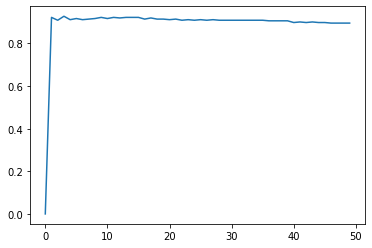

In [42]:
knn_df[0].plot.line()

In [43]:
#highest accuracy is obtained when n_neighbors=15
knn=KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
predictions=knn.predict(X_test)

In [44]:
# print(confusion_matrix(predictions,y_test))

In [45]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       1.00      0.90      0.94       269
           1       0.79      0.99      0.88       104

    accuracy                           0.92       373
   macro avg       0.89      0.94      0.91       373
weighted avg       0.94      0.92      0.92       373



In [46]:
print(accuracy_score(y_test,predictions))

0.9222520107238605


In [47]:
#accuracy=95.17

# Random Forest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:

rf=RandomForestClassifier(n_estimators=500,max_depth=200)


In [50]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=200, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [51]:
predictions=rf.predict(X_test)


In [52]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97       242
           1       0.97      0.89      0.93       131

    accuracy                           0.95       373
   macro avg       0.96      0.94      0.95       373
weighted avg       0.96      0.95      0.95       373



In [53]:
print(confusion_matrix(y_test,predictions))

[[239   3]
 [ 14 117]]


In [54]:
print(accuracy_score(y_test,predictions))

0.9544235924932976


In [55]:
#accuracy of 95.7%

# SVM Linear Kernel

In [56]:
from sklearn.svm import SVC 

In [57]:
l=SVC(kernel='linear')

In [58]:
l.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [59]:
predictions=l.predict(X_test)
print(confusion_matrix(y_test,predictions))

[[238   4]
 [ 12 119]]


In [60]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       242
           1       0.97      0.91      0.94       131

    accuracy                           0.96       373
   macro avg       0.96      0.95      0.95       373
weighted avg       0.96      0.96      0.96       373



In [61]:
print(accuracy_score(y_test,predictions))

0.9571045576407506


# SVM Gaussian rbf Kernel

In [62]:
l=SVC(kernel='rbf')

In [63]:
l.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [64]:
predictions=l.predict(X_test)
print(confusion_matrix(y_test,predictions))

[[241   1]
 [ 17 114]]


In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       242
           1       0.99      0.87      0.93       131

    accuracy                           0.95       373
   macro avg       0.96      0.93      0.95       373
weighted avg       0.95      0.95      0.95       373



In [66]:
print(accuracy_score(y_test,predictions))

0.9517426273458445


# Naive Bayes

In [67]:
from sklearn import naive_bayes

In [68]:
NB=naive_bayes.GaussianNB()

In [69]:
NB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [70]:
predictions=NB.predict(X_test)

In [71]:
print(accuracy_score(y_test,predictions))

0.9490616621983914


In [72]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       242
           1       0.98      0.87      0.92       131

    accuracy                           0.95       373
   macro avg       0.96      0.93      0.94       373
weighted avg       0.95      0.95      0.95       373



In [73]:

print(confusion_matrix(y_test,predictions))

[[240   2]
 [ 17 114]]


# Neural Network

In [76]:
from tensorflow.keras.regularizers import l2

In [77]:
model = Sequential()
model.add(Dense(16, input_dim=30,kernel_regularizer=l2(0.01), activation='relu'))
model.add(Dense(32, kernel_regularizer=l2(0.01),activation='relu'))
model.add(Dense(48, kernel_regularizer=l2(0.01),activation='relu'))
# model.add(Dense(64, kernel_regularizer=l2(0.01),activation='relu',))
# model.add(Dense(128, kernel_regularizer=l2(0.01),activation='relu',))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [78]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [130]:
from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer=ModelCheckpoint(filepath='Convolutional.hdf5',verbose=1,save_best_only=True)
history = model.fit(x=X_train,y= y_train, epochs=20, batch_size=16,validation_data=(X_test,y_test))

Train on 1119 samples, validate on 373 samples
Epoch 1/20
1119/1119 [==============================] - 0s 94us/sample - loss: 0.1048 - acc: 0.9866 - val_loss: 0.2259 - val_acc: 0.9517
Epoch 2/20
1119/1119 [==============================] - 0s 87us/sample - loss: 0.1023 - acc: 0.9830 - val_loss: 0.2225 - val_acc: 0.9491
Epoch 3/20
1119/1119 [==============================] - 0s 86us/sample - loss: 0.0962 - acc: 0.9821 - val_loss: 0.2360 - val_acc: 0.9491
Epoch 4/20
1119/1119 [==============================] - 0s 86us/sample - loss: 0.0947 - acc: 0.9857 - val_loss: 0.2370 - val_acc: 0.9517
Epoch 5/20
1119/1119 [==============================] - 0s 86us/sample - loss: 0.0949 - acc: 0.9884 - val_loss: 0.2366 - val_acc: 0.9437
Epoch 6/20
1119/1119 [==============================] - 0s 85us/sample - loss: 0.0946 - acc: 0.9866 - val_loss: 0.2328 - val_acc: 0.9464
Epoch 7/20
1119/1119 [==============================] - 0s 88us/sample - loss: 0.0984 - acc: 0.9839 - val_loss: 0.2314 - val_acc: 0

In [131]:

#accuracy of 95.7%

In [132]:
score=model.evaluate(X_test,y_test,verbose=1)               #evaluates the model
accuracy=100*score[1]                                       
print('Test accuracy is %.4f%%' % accuracy)

373/373 [==============================] - 0s 51us/sample - loss: 0.2340 - acc: 0.9464
Test accuracy is 94.6381%


In [133]:
score=model.evaluate(X_train,y_train,verbose=1)               #evaluates the model
accuracy=100*score[1]                                       
print('Test accuracy is %.4f%%' % accuracy)

1119/1119 [==============================] - 0s 26us/sample - loss: 0.0847 - acc: 0.9875
Test accuracy is 98.7489%


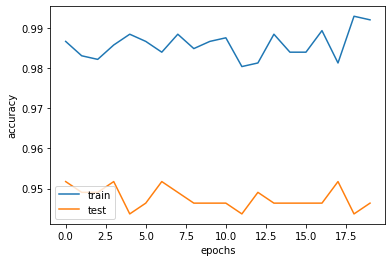

In [134]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train','test'],loc='lower left')

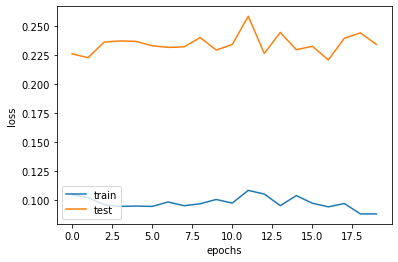

In [135]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train','test'],loc='lower left')